In [11]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.costs import *
from functions.helpers import *
from functions.split import *
from functions.ridge_regression import *
from functions.helpers import *
from functions.least_squares_GD import *
from functions.clean_data import *
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
DATA_FOLDER = 'data'

TRAINING_DATA = ['train_jet_0_wout_mass.csv' , 'train_jet_0_with_mass.csv',
                 'train_jet_1_wout_mass.csv' , 'train_jet_1_with_mass.csv',
                 'train_jet_2_wout_mass.csv' , 'train_jet_2_with_mass.csv',
                 'train_jet_3_wout_mass.csv' , 'train_jet_3_with_mass.csv']

In [56]:
# Just to test
data_file = DATA_FOLDER + '/' + TRAINING_DATA[7]
# Load the file
y, x, ids = load_csv_data(data_file)
_, _, _, headers = load_data(data_file)
x = std(x)

In [57]:
# Mean vector
mean_vec = np.mean(x)
# Cov matrix
cov_mat = np.cov(x.T)
#print('Covariance matrix \n%s'%cov_mat)

In [58]:
# Eigen vectors and eigen values
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[  5.96074646e+00   3.08135983e+00   2.70129726e+00   1.75583100e+00
   1.73397291e+00   1.69745631e+00   1.56778868e+00   1.07762664e+00
   1.06520548e+00   1.05967816e+00   9.86333492e-01   3.07873178e-02
   4.53555593e-02   5.43950086e-02   9.85502204e-02   1.04923914e-01
   1.32264145e-01   1.79154906e-01   2.59961592e-01   2.81067021e-01
   8.08142702e-01   7.74133974e-01   7.86803120e-01   3.97927633e-01
   6.53839332e-01   5.44041765e-01   5.69582948e-01   5.93174536e-01
   7.97084890e-12]


In [59]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [60]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.96074646034
3.08135982508
2.70129725845
1.75583100238
1.73397290877
1.6974563077
1.56778868224
1.07762663826
1.06520548498
1.05967815895
0.986333491766
0.808142701952
0.786803119781
0.774133974408
0.653839332287
0.593174536109
0.569582948066
0.544041764816
0.397927633406
0.281067020986
0.259961592049
0.179154906212
0.132264144958
0.104923914379
0.0985502203749
0.0543950085629
0.0453555593081
0.0307873177679
7.97084890474e-12


In [61]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)


[  20.55330455   31.17816964   40.49253749   46.54683448   52.52576238
   58.37877704   63.78468358   67.50045788   71.17340268   74.82728866
   78.22827423   81.01483849   83.72782155   86.39712      88.6516294
   90.69695996   92.66094415   94.53685955   95.90895748   96.87810725
   97.7744832    98.39222888   98.84829009   99.2100792    99.54989112
   99.73745105   99.89384197  100.          100.        ]


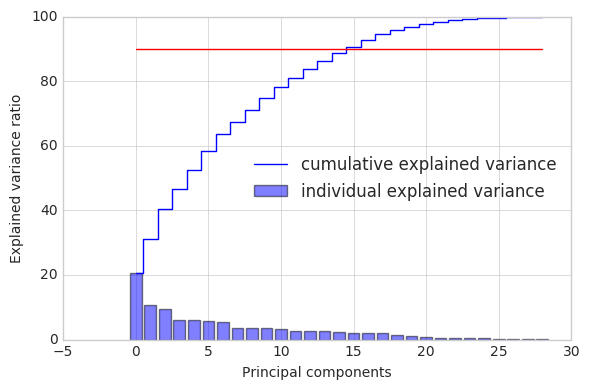

In [62]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(eig_vals)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(eig_vals)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.plot(range(len(eig_vals)), 90*np.ones(len(eig_vals)), 'r-')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()



In [63]:
# Projection Matrix
array = []
threshold = 90
for i in range(len(eig_vals)):
    array.append(eig_pairs[i][1].reshape(len(eig_vals),1))
    
    if cum_var_exp[i] > threshold:
        break
matrix_w = np.hstack(array)

(20687, 16)
(20687, 29)


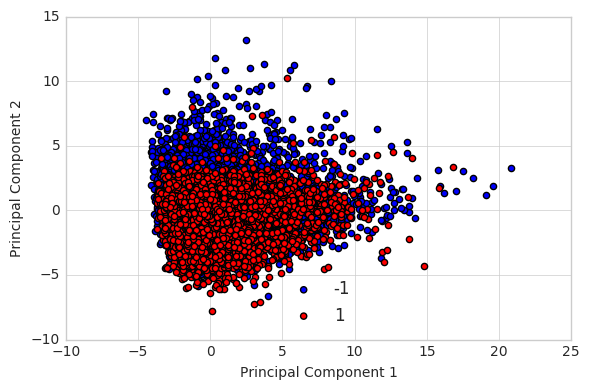

In [64]:
proj = x.dot(matrix_w)
print(proj.shape)
print(x.shape)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((-1,1), ('blue', 'red')):
        plt.scatter(proj[y==lab, 0],
                    proj[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

